# HOW HAS STATCAST CHANGED BASEBALL

Major League Baseball introduced Statcast back in 2015. The most revolutionary and innovative technology ever unveiled in baseball added layers of complexity never seen in the game. Through multiple cameras and radar, the league compiles metrics on things previously unheard of, such as pitch spin rate, route efficiency, and first step effectiveness.

As a result, Statcast created an "arms race" of data throughout baseball. Teams have compiled their data analysts to comb through these metrics and make critical decisions on how to play to gain every competitive advantage. This document looks to explore that competitive advantage. How has baseball changed since the introduction of the Statcast era? What makes successful players in today's league, and what trends are emerging with players as their career progresses in this data-driven game?

This topic is vast; therefore, this assignment will only look at pitchers. The goal of this is to explain to veterans of the game how their beloved pastime is evolving and maybe excite new people to check out one of the most popular sports on the planet.

**GETTING STARTED**

**Tools for the Job**

We will be using Python 3 as well as some popular data science/visualization libraries such as: pandas, numpy, sklearn, matplotlib, statsmodels, and more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lr
import statsmodels.regression.linear_model as lm
import statsmodels.api as sm
%matplotlib inline

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


**Where our data comes from**

Major League Baseball sponsors a page called BaseballSavant. Baseball Savant holds all Statcast data on every player in the league over the last 7 years. We obtained the data by searching through the statistics and creating a CSV (Comma Separated File) with every pitcher's requested metrics.

**PREPROCESSING DATA**

Having been managed by MLB and BaseballSavant, our data already came (mostly) cleaned and parsed. The CSV is already attached, but you may go and create your own custom CSV with all relevant data here.

Some pitfalls with using BaseballSavant is that they're compiling data for the 2022 season as it is ongoing. As a result, some stats will be incomplete, as some players have only pitched a few innings. We will take this into consideration in our dataset.

Furthermore, the 2020 season was shortened to 60 games, only 37% of the original amount played. Therefore, we will have to adjust for this as well later on. 

Finally, there could be a lot of errors as a result of pitchers not throwing many innings. Injuries, rookies, and many other outlying conditions could lead to weird discrepancies in our results. To account for all these forms of error, we only looked at pitchers with a large sample size to choose from. Therefore, we will only be analyzing pitchers from the last 7 years who have faced over 100 batters

**READING DATA**

In [2]:
pitch_data = pd.read_csv('stats-3.csv')
pitch_data.head()

,last_name,first_name,player_id,year,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,p_k_percent,...,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z,Unnamed: 31
0,Wainwright,Adam,425794,2022,6,34.0,31,28,13,20.0,...,72.9,2692.0,17.2,-67.3,11.2,82.7,1759.0,-15.3,-31.8,NaN
1,Greinke,Zack,425844,2022,6,33.2,34,10,3,7.5,...,76.5,2408.0,10.5,-50.7,16.4,86.3,1586.0,-12.7,-32.9,NaN
2,Verlander,Justin,434378,2022,5,32.2,19,31,4,26.3,...,83.4,2469.0,4.9,-41.2,0.7,84.5,1936.0,-13.0,-22.4,NaN
3,Kluber,Corey,446372,2022,5,26.2,22,25,6,23.8,...,80.5,2469.0,17.7,-42.8,9.3,83.2,1664.0,-13.4,-33.5,NaN
4,Morton,Charlie,450203,2022,6,28.2,30,23,17,17.2,...,81.0,3002.0,15.2,-52.2,7.4,87.2,2137.0,-19.1,-32.8,NaN


Our dataset is absolutley massive. Let's display some of the column names below and exactly what they mean.

In [3]:
pitch_data.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'p_game',
       'p_formatted_ip', 'p_total_hits', 'p_strikeout', 'p_walk',
       'p_k_percent', 'p_bb_percent', 'p_win', 'p_era', 'exit_velocity_avg',
       'launch_angle_avg', 'hard_hit_percent', 'n_fastball_formatted',
       'fastball_avg_speed', 'fastball_avg_spin', 'fastball_avg_break_x',
       'fastball_avg_break_z', 'n_breaking_formatted', 'breaking_avg_speed',
       'breaking_avg_spin', 'breaking_avg_break_x', 'breaking_avg_break_z',
       'n_offspeed_formatted', 'offspeed_avg_speed', 'offspeed_avg_spin',
       'offspeed_avg_break_x', 'offspeed_avg_break_z', 'Unnamed: 31'],
      dtype='object')

<br>

Our Data Can be Segmented into 3 Parts:

<br>

**Part 1: Basic Statistics**

- last_name, first_name, player_id, and year: Last name, first name, and player id for the pitcher

- p_game: Number of games pitched in

- p_formatted_ip: Number of total innings pitched

- p_total_hits: Hits given up in a season

- p_strikeout: Total number of strikeouts in a season

- p_walk: Total number of walks allowed in a season

- p_k_percent: Strikeout percentage

- p_bb_percent: Walk percentage

- p_win: Number of wins earned in the season

- p_era: Earned Run Average (Estimated runs given up every 9 innings pitched)

**Part 2: Sabermetrics**

- exit_velocity_avg: On average, when a player hits a ball against this pitcher, how fast is it hit

- launch_angle_avg: On average, when a player hits a ball against this pitcher, what angle is the ball travelling at?

- hard_hit_pct: On average, of all at bats this pitcher pitched against, how many resulted in a hart hit ball ( exit velo >= 95 mph )


**Part 3: Pitch Sabermetrics**

We break down the types of pitches a pitcher can throw into 3 categories, fastball, breaking, and offspeed. For each of these types of pitches,

- n_*_formatted: What percentage of pitches throw by this pitcher were this type?

- *_avg_speed: On average, how fast was this type of pitch?

- *_avg_spin: On average, how many RPM (revolutions per minute) did this pitch have?

- *_avg_break_(x,z): On average how much does the pitch drop (z-direction) and how much does the pitch move horizontally (x-direction)

**TIDYING DATA**

As mentioned earlier, BaseballSavant gave us a pretty great dataset. However, there are some shortcomings with the data. Firstly, it seems we have an unnecessary column named 'Unnamed: 31'. Let us verify that there is no valid data in that column and delete it

In [4]:
# Getting all unique values inside pitch_data['Unnamed: 31']

hold = []
for x in pitch_data['Unnamed: 31']:
    if not np.isnan(x):
        hold.append(x)
len(hold)

0

In [5]:
# It is unnecessary, therefore we should delete it
pitch_data.drop(['Unnamed: 31'], axis=1, inplace=True)
pitch_data.head()

,last_name,first_name,player_id,year,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,p_k_percent,...,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z
0,Wainwright,Adam,425794,2022,6,34.0,31,28,13,20.0,...,27.4,72.9,2692.0,17.2,-67.3,11.2,82.7,1759.0,-15.3,-31.8
1,Greinke,Zack,425844,2022,6,33.2,34,10,3,7.5,...,42.7,76.5,2408.0,10.5,-50.7,16.4,86.3,1586.0,-12.7,-32.9
2,Verlander,Justin,434378,2022,5,32.2,19,31,4,26.3,...,49.3,83.4,2469.0,4.9,-41.2,0.7,84.5,1936.0,-13.0,-22.4
3,Kluber,Corey,446372,2022,5,26.2,22,25,6,23.8,...,30.6,80.5,2469.0,17.7,-42.8,9.3,83.2,1664.0,-13.4,-33.5
4,Morton,Charlie,450203,2022,6,28.2,30,23,17,17.2,...,38.2,81.0,3002.0,15.2,-52.2,7.4,87.2,2137.0,-19.1,-32.8


Another issue we mentioned is the fact that the 2022 season is currently ongoing. With the league only having played around ~20 games at this point in the season, very little pertinent info such as average pitch speed should be considered. Therefore, as of the time of creating this tutorial, we should remove any incomplete data and only work with accurate information 

In [6]:
# Effectively remove all data being collected in 2022
pitch_data = pitch_data[pitch_data['year'] != 2022]
pitch_data.head()

,last_name,first_name,player_id,year,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,p_k_percent,...,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z
105,Colon,Bartolo,112526,2018,28,146.1,172,81,25,12.9,...,7.4,80.5,2388.0,4.3,-42.8,11.1,80.8,1657.0,-13.8,-36.1
106,Belisle,Matt,279571,2018,33,34.1,49,25,11,15.4,...,44.9,83.4,2164.0,5.0,-36.2,0.2,85.2,1364.0,-10.2,-28.7
107,Sabathia,CC,282332,2018,29,153.0,150,140,51,21.1,...,30.9,80.0,2250.0,-11.5,-41.4,10.1,83.4,1878.0,9.1,-30.9
108,De La Rosa,Jorge,407822,2018,59,56.0,51,47,27,19.3,...,4.4,75.2,2647.0,-11.5,-62.5,40.1,83.6,1424.0,12.0,-37.6
109,Rodney,Fernando,407845,2018,68,64.1,62,70,32,24.6,...,0.3,86.5,2182.0,3.0,-30.5,29.2,82.8,1735.0,-15.1,-32.7


Another issue we have to contend with is the shortening of the 2020 season. That season reduced the total number of games to 60 as opposed to a traditional 162 games a year. Later, most of our analysis will deal with things in terms of ratio's so we won't have to worry about it. However, for some display purposes we will want to scale it to a traditional 162 game season. Therefore, let's create a seperate dataframe that is scaled appropriatley. 

In [7]:
adjusted_rate = 162/60
adjusted_pitch_data = pitch_data.copy() 

for index, row in adjusted_pitch_data.iterrows():
    if row['year'] == 2020:
        for item in ['p_formatted_ip', 'p_total_hits', 'p_game', 'p_strikeout', 'p_walk', 'p_win']:
            adjusted_pitch_data.at[index,item] = int(row[item] * adjusted_rate)
        

In [8]:
adjusted_pitch_data[adjusted_pitch_data['year'] == 2020].head()

,last_name,first_name,player_id,year,p_game,p_formatted_ip,p_total_hits,p_strikeout,p_walk,p_k_percent,...,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z
622,Wainwright,Adam,425794,2020,27,176.0,145,145,40,20.6,...,38.3,73.5,2791.0,16.8,-65.5,2.5,81.8,1683.0,-13.6,-33.8
623,Greinke,Zack,425844,2020,32,180.0,180,180,24,24.5,...,33.2,77.7,2425.0,8.5,-49.1,23.3,86.2,1668.0,-13.1,-32.4
624,Sanchez,Anibal,434671,2020,29,143.0,189,116,48,17.6,...,6.6,76.8,2044.0,4.2,-47.7,35.6,79.6,1492.0,-13.1,-37.0
625,Kintzler,Brandon,445213,2020,64,65.0,56,37,29,13.9,...,10.5,84.6,2322.0,1.1,-35.7,13.1,85.9,2065.0,-17.6,-27.9
626,Jansen,Kenley,445276,2020,72,65.0,51,89,24,32.4,...,9.6,81.6,2334.0,6.9,-45.4,NaN,NaN,NaN,NaN,NaN


Finally, baseball savant provided some rather interesting measurements regarding pitch movement. Baseball savant gave the option between pitch average movement and pitch horizontal/vertical movement. However, pitch average measurement didn't seem to have any standardized unit of measurement we could find, so we compiled a total movement chronicalling its total direction moved. 

We used absolute value as pitches can move left,right,up, or down. Therefore, pitches that break left and up have negative values, so we wanted to make sure that we included those values in our calculations

In [9]:
adjusted_pitch_data['fastball_total_movement'] = adjusted_pitch_data.apply(lambda x: abs(x['fastball_avg_break_x']) + abs(x['fastball_avg_break_z']), axis=1)
adjusted_pitch_data['breaking_total_movement'] = adjusted_pitch_data.apply(lambda x: abs(x['breaking_avg_break_x']) + abs(x['breaking_avg_break_z']), axis=1)
adjusted_pitch_data['offspeed_total_movement'] = adjusted_pitch_data.apply(lambda x: abs(x['offspeed_avg_break_x']) + abs(x['offspeed_avg_break_z']), axis=1)

**Classifying pitchers**

Furthermore, there are two classes of pitchers. One type of pitcher is called a starter. When beginning the game, the starter will be the first one to pitch. The team expects them to go for as many innings as possible, often going 5-7 innings, or even longer. Starters will also pitch every 5 or so days, resulting in them pitching around 30 games a year if they can stay healthy. 

Relievers come in after the starter. Most relievers will only pitch for one-3 innings at a time, and may pitch multiple times in the same week. As such, starters and relievers have different approaches. Starters want to burn as many innings as possible and conserve energy, while relievers look to throw at max effort and be difficult to hit against. As such, these two types of pitchers should be split when looking at key metrics. 

According to the internet, relievers throw around ~70 innings per year. However, to account for some anomalies, we will up this number to 90 to prevent some particularly efficient relievers from becoming mixed in with our starters

In [10]:
starters = adjusted_pitch_data[adjusted_pitch_data['p_formatted_ip'] > 90]
relievers = adjusted_pitch_data[adjusted_pitch_data['p_formatted_ip'] <= 90]

# Exploratory Data Analysis

Lets Begin with the analysis! As the league has become more analytical, certain quaities in pitchers have become more desirable. We can exhibit trends throughout our dataset through the use of libraries such as Matplotlib. Matplotlib is just one of many different data visualization libraries available, with some others being seaborn, plotly, ggplot, and many more. 

To start, let's look at the league's distribution of pitches and see if we can notice any change. To do this, let's check out our entire league average, our average among starting pitchers, and our average among relievers to see if we can spot any trends.

Due to the sheer amount of graphs we need to make, we want to avoid copy and pasting code as much as we can. Therefore we utilize a function called line_graph_maker that can take in a column and title as the parameter and plot the graph from there. This can be done since each plot will be very similar and comes out of the same dataframe, making it easy to create a function to make the graph for us. Let's get started!

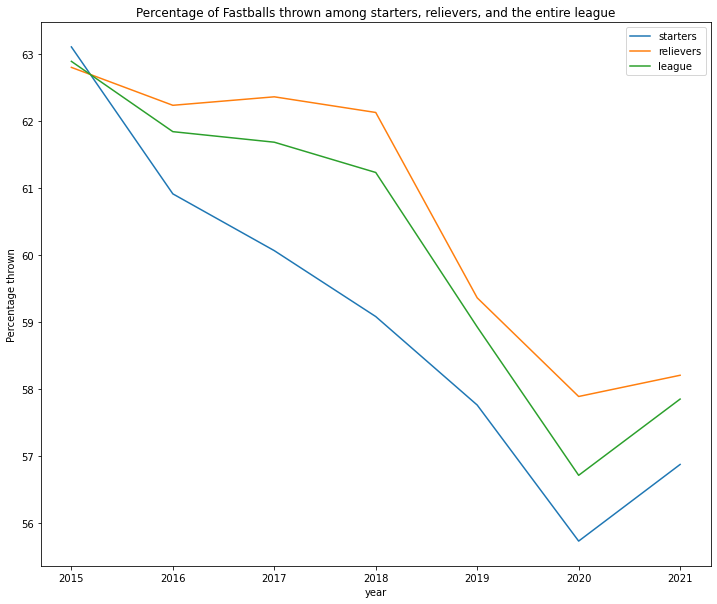

In [11]:
#We want our plots to be larger than the default plot size, so we can manually change it to be larger with this command.
plt.rcParams["figure.figsize"] = (12,10)

# Firstly, what we'll do is group our starters, relievers, and entire league data by year, and take average of number of each pitch thrown
grouped_starters = starters.groupby(by=['year']).mean().reset_index()
grouped_relievers = relievers.groupby(by=['year']).mean().reset_index()
grouped_league = adjusted_pitch_data.groupby(by=['year']).mean().reset_index()

# We'll create a function to prevent code reuse. We will call on this to make our linegraphs for the upcoming analysis
def line_graph_maker(column, title):
    
    # To start, we'll utilize Seaborn's lineplot feature to give us a look at our data
    sns.lineplot(x='year', y=column, data=grouped_starters)
    sns.lineplot(x='year', y=column, data=grouped_relievers)
    sns.lineplot(x='year', y=column, data=grouped_league)

    # Finally, we will use Matplotlib to add a legend to our graph
    plt.ylabel("Percentage thrown")
    plt.title("Percentage of " + title + " thrown among starters, relievers, and the entire league")
    plt.legend(labels=['starters', 'relievers', 'league'])

    
line_graph_maker('n_fastball_formatted', "Fastballs")

Very interesting! Since the introduction of the statcast era, pitchers have been deciding to lay off throwing their fastballs. Starters have seen the most drastic change in this regard, throwing their fastballs >63% of the time in 2015 to around 57% in 2021. 

One thing worth mentioning is the 2020 season. The 2020 season will be a very interesting one in our analysis and one we will continue to mention moving forward. 2020 was our "Covid Year" and as a result many players would often miss games to do covid restrictions, or would outright not play at all. This could mean those that remained favored a certain style of pitch, and impacted these results.  

But returning to our original point, if the league is throwing fewer fastballs in the statcast era, what else are they throwing? Let's check our other pitches (breaking and offspeed) and see what they can show us.

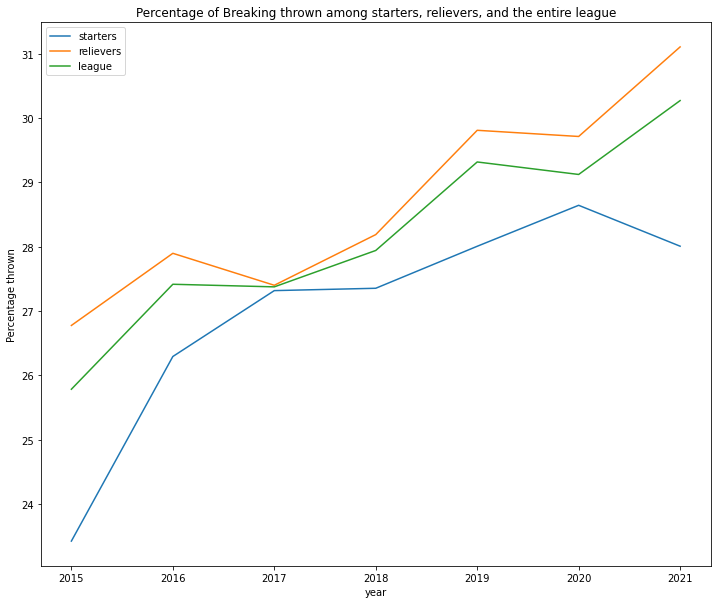

In [12]:
line_graph_maker('n_breaking_formatted', "Breaking")

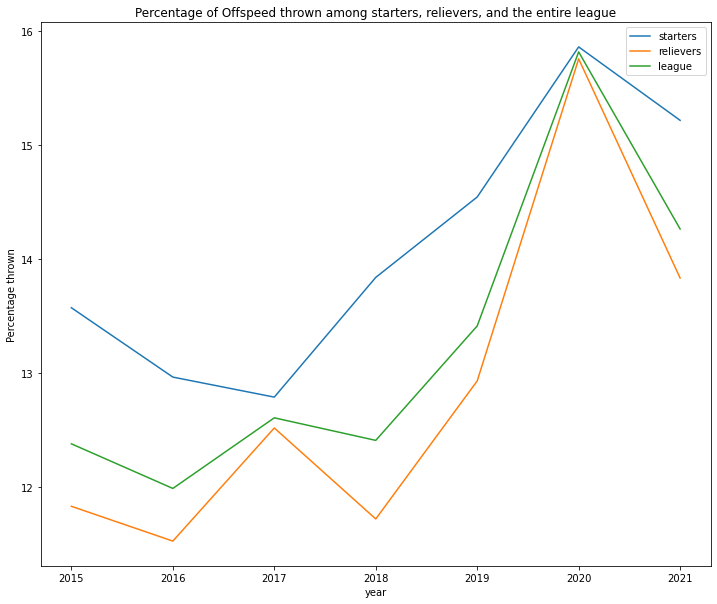

In [13]:
line_graph_maker('n_offspeed_formatted', "Offspeed")


Very Cool! We notice that curveballs have had a incredible surge in usage in the last 7 years, rising nearly 4% leaguewide while offspeed pitches have seen an increase but not much, rising only ~1% in the last 7 years. 

We can also see a big shift in favorites regarding relievers and starters here. Starters and relievers both moved away from their fastballs, but Starters looked to favor breaking balls and offspeed more than relievers, gaining ~3% in total breaking ball use and ~1.5% increase in offspeed use. Relievers opted to focus most of their repetiore toward their breaking ball, throwing that pitch 4% more than they did 7 years ago, and their offspeed ~2% more than 7 years prior. 

Finally, the most interesting thing of note is the divergence on the breaking ball preference. After the 2020 season, Relievers opted to throw less offspeed and fastballs in favor of breaking balls. While Starters opted to revoke both breaking and offspeed pitches in favor of the fastball, breaking a nearly 6 year trend in decline. 

# Sabermetrics

We have seen a large paradigm shift in pitches thrown throughout the league. Pitchers are moving away from traditional fastballs in favor of pitches like breaking balls. Why is that? Have breaking balls proven more effective as the league has progressed? Have pitchers gotten better when throwing them?

We'll start by looking at a favorite sabermetric by baseball analysts, spin rate. Spin rate are the revolutions per minute a baseball makes on its way to home plate. More about spinrate can be learned <a href="https://www.mlb.com/glossary/statcast/spin-rate">here</a>. Let's analyze what MLB pitchers are doing to spin their pitches since the introduction of the statcast era

In [14]:
# We will reuse our earlier definition of linegraph maker with some small adjustements to the y axis label to reflect the spinrate in RPM's
def line_graph_maker(column, title):
    
    # To start, we'll utilize Seaborn's lineplot feature to give us a look at our data
    sns.lineplot(x='year', y=column, data=grouped_starters)
    sns.lineplot(x='year', y=column, data=grouped_relievers)
    sns.lineplot(x='year', y=column, data=grouped_league)

    # Finally, we will use Matplotlib to add a legend to our graph
    plt.ylabel("Average Spin (RPMs)")
    plt.legend(labels=['starters', 'relievers', 'league'])

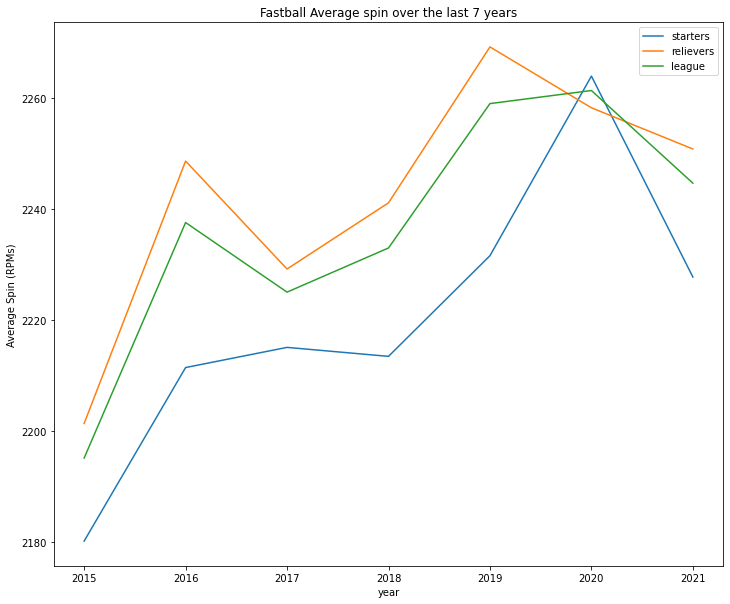

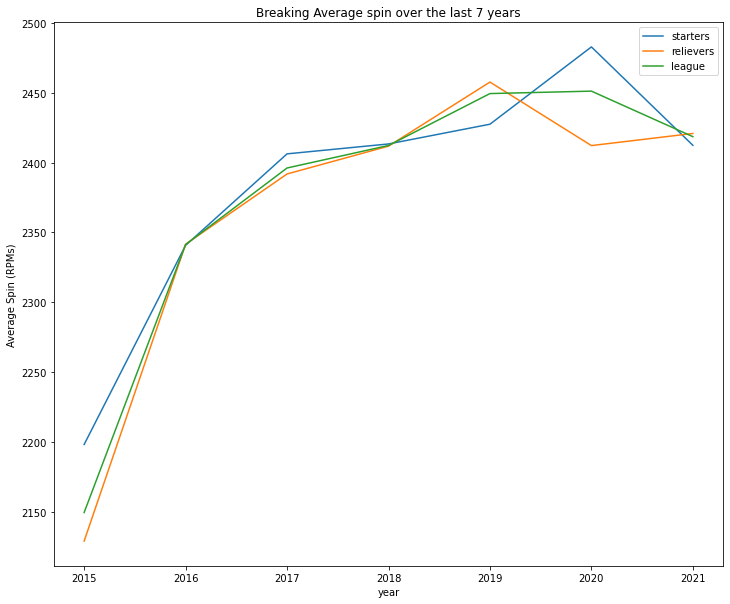

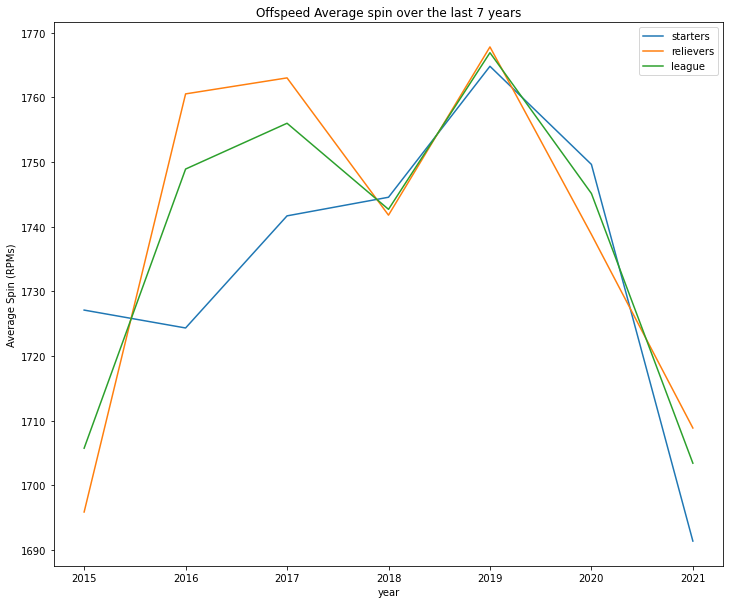

In [15]:
# Make the fastball chart
line_graph_maker('fastball_avg_spin', "fastball")
plt.title("Fastball Average spin over the last 7 years")
plt.show()

# Breaking ball chart
line_graph_maker('breaking_avg_spin', "Offspeed")
plt.title("Breaking Average spin over the last 7 years")
plt.show()

# Offspeed chart
line_graph_maker('offspeed_avg_spin', "Offspeed")
plt.title("Offspeed Average spin over the last 7 years")
plt.show()

So what can we get out of this?

- Pitchers are throwing the fastball and curveball  with more spin
    - This is an interesting find. The breaking ball has seen a huge surgence in interest since the statcast era while the fastball has waned. Yet, both follow the same trend how pitchers are increasing their spin rate. This will be something useful to investigate

<br>


- They're not throwing the offspeed much different.
    - This reflects well with our tendency charts we made earlier. The offspeed pitches have seen stagnation in usage over the last 7 years, and it seems that their spinrate has as well. Seeing a large surgence until the 2020's, the usage of the offspeed seems to have found its place in the league.
    
    
    
However, these insights offer some interesting follow up questions. Why are big leaguers opting to get more spin on their fastballs and curveballs? What affects does an increased spinrate have on their ball? Lets observe this by creating scatterplots mapping pitch spin rate to its movement and to its speed. We use a for loop to iterate through our types of pitches of interest to avoid duplicating code. The loop goes through the types of pitches and plots 2 charts for each, one with avg spin and movement for the pitch, the other with avg spin and speed for the pitch.

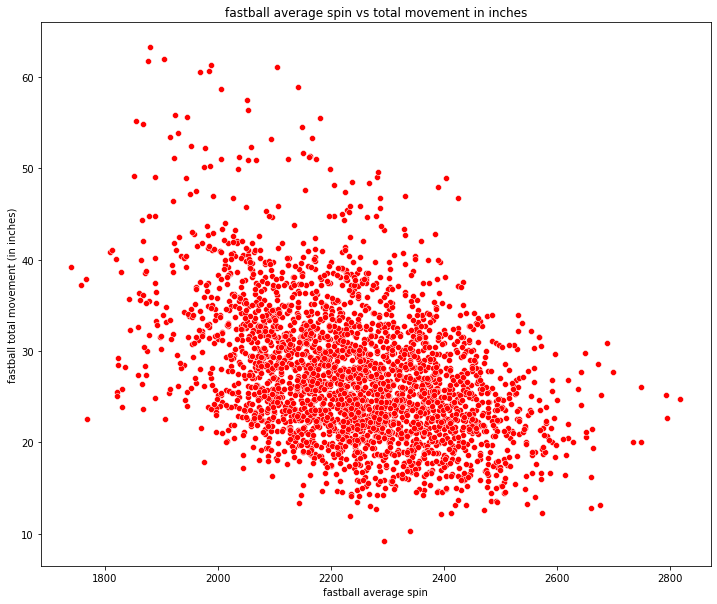

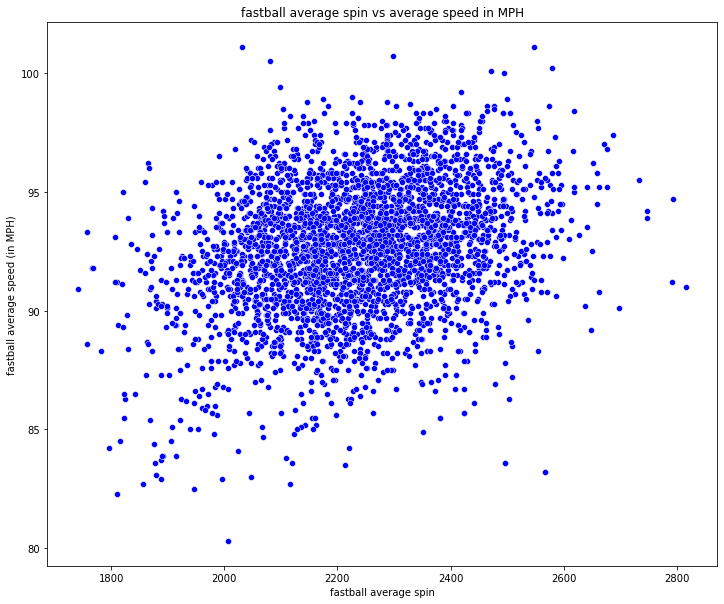

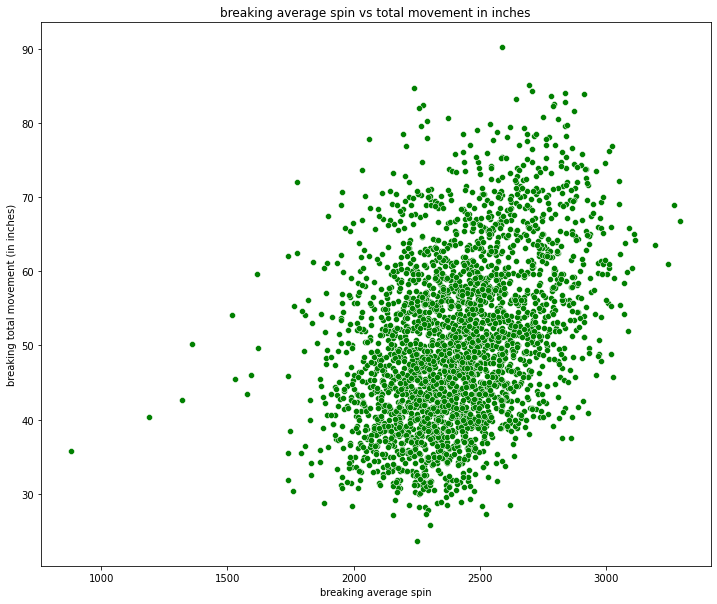

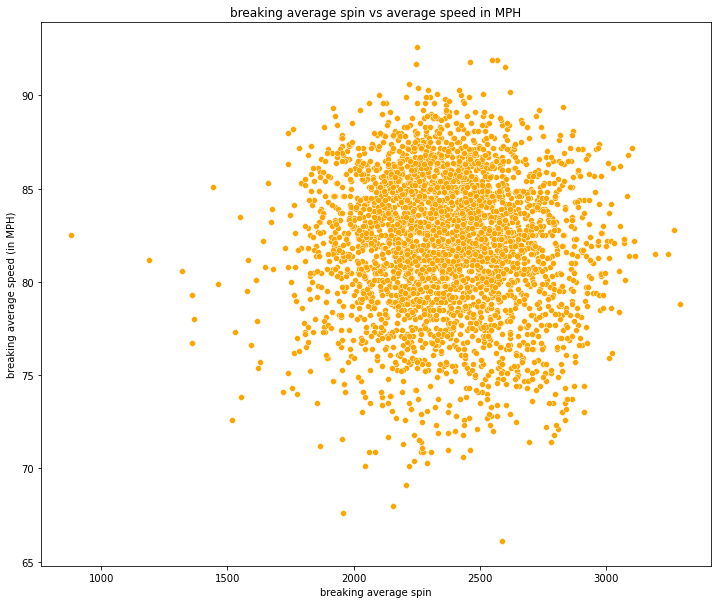

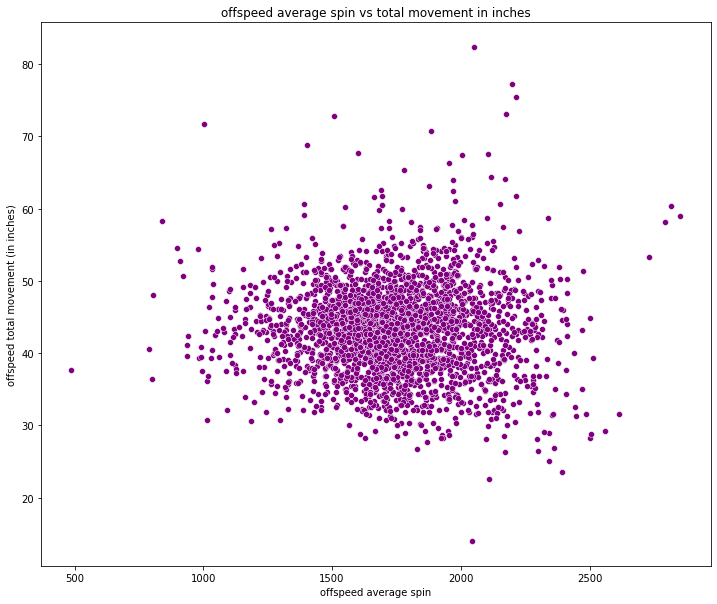

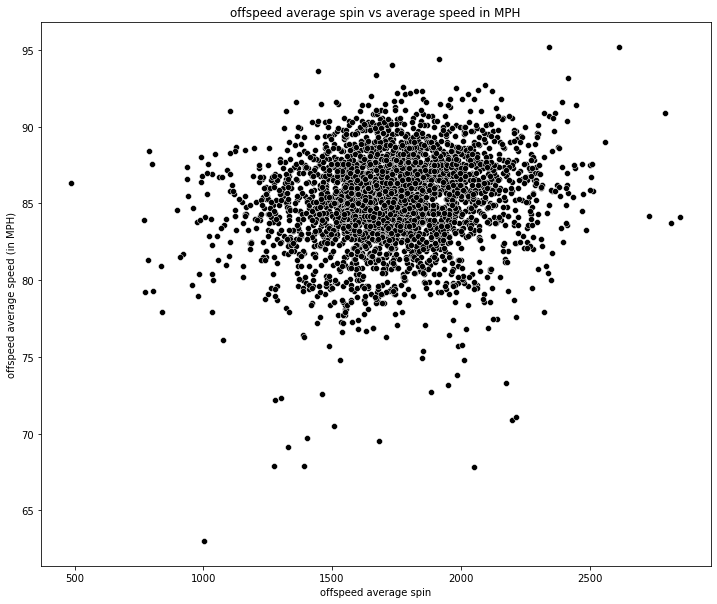

In [16]:
# Some colors for our graphs
colors = ['red' ,'blue', 'green', 'orange', 'purple', 'black']
item = 0
for a in ['fastball', 'breaking', 'offspeed']:
    
    # Make a seaborn scatterplot showing the relationship between spin and movement for the given pitch
    sns.scatterplot(data=adjusted_pitch_data, x= a+'_avg_spin', y= a+ '_total_movement', color=colors[item])
    plt.title(a + " average spin vs total movement in inches")
    plt.xlabel(a + " average spin")
    plt.ylabel(a + " total movement (in inches)")
    plt.show()
    
    # Make a seaborn scatterplot showing the relationship between spin and speed for the given pitch
    sns.scatterplot(data=adjusted_pitch_data, x= a+'_avg_spin', y= a+'_avg_speed', color=colors[item+1])
    plt.title(a + " average spin vs average speed in MPH")
    plt.xlabel(a + " average spin")
    plt.ylabel(a + " average speed (in MPH)")
    
    plt.show()
    item += 2



**Super Cool! So what did we find?**

- Fastballs, the more you spin them, THE LESS THEY MOVE!
    - This could be a huge revelation as to why pitchers aren't throwing these pitches as much! Fastballs have become more of a tool to overpower hitters with blind speed, as opposed to being a truly difficult pitch to hit! Therefore, pitchers are using these more conservatively, as fastballs don't serve as a multipurpose tool anymore
    
- Curveballs, they more you spin them, THE MORE THEY MOVE!
    - Curveballs have been shown not to have a correlation between spin and speed, but with spin and movement. The more pitchers are able to spin the breaking ball, the more it moves, and we will explore in a bit why this might be an effective tool
    
- Offspeed: Nothing has really changed
    - There doesn't really seem to be any big changes regarding the movement or speed of offspeed pitch if you spin it faster. As a result, this may explain the steady usage of the pitch over the last 5 years. The league has sort of figured out its effectiveness and therefore has concluded that the strategy it currently has works



### Tie Pitching All Together ###
Now let's tie this all together and look at how the pitch speed and movement impact their ***strike out percentage***!

Strikeouts are a big deal. Strikeouts are the most success a pitcher can have when facing a batter. A strikeout does not allow
runners to advance, and it doesn't put pressure on the defense to make a play. 

We will use a heat map to visualize this since we have 3 variables per visualization. Additionally, this will help us recognize trends and where the best strike out groupings are. Since heatmaps are a new type of visualization we have not done yet before, we have to do things a bit differenty. We will be using the seaborn heatmap plotter for ease of use. However, the dataframe must be formatted in a very specific way in order for any heat map function to work. The dataframe must have on the X index all values that will go on the X axis, and the same for the Y. Then the values for the x,y pairings will be the data to be plotted on the heat map, which in this case is strike out percentage. With our current imported dataframe, our X index is a numerical ordering index, and our y index is just the type of data. Therefore we have to reformat our dataframe to the specified requirements, which we can do with group by functions, pivots, and resetting indices. However, before we even go there, we have to filter our data so that we can avoid duplicate x values (in this situation speed), so that there aren't multiple x values with different y values, causing errors. To do this, we categorize our data points into specific range buckets and categories to organize them (sort of like a histogram).

With both these tasks done, we can plot our graphs, label them, and look for trends!

Since the heat map requires specific data frame formats, x and y ticks and axis formats, as well as having a different data range for each that has to be specified, it would be extremely tedious to create a function or for loop to graph the three heatmaps. Therefore we will hard code each heat map 3 times in a row for ease of calculation and editing.

Let's break it down:

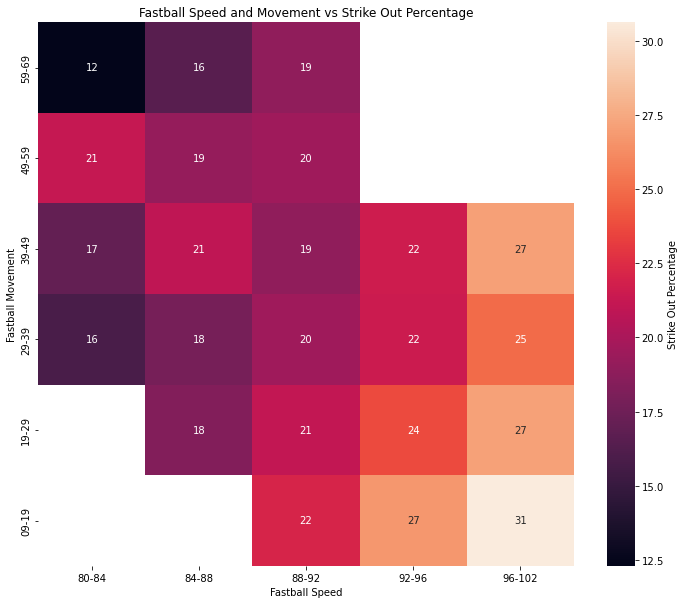

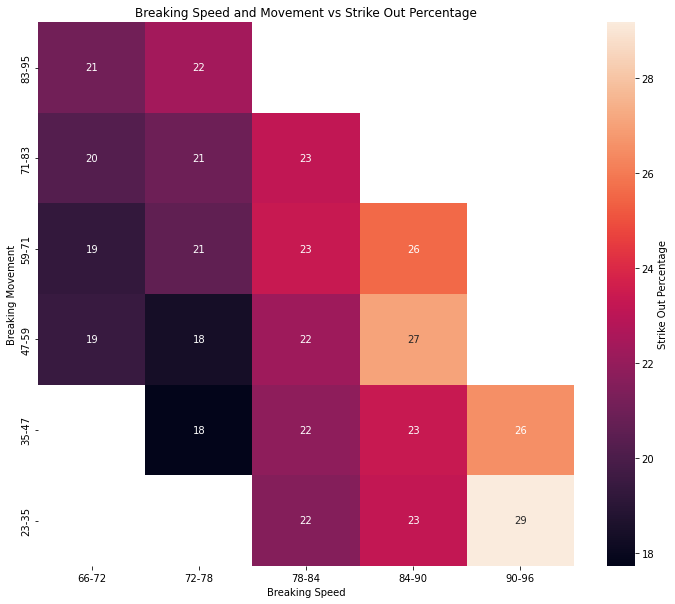

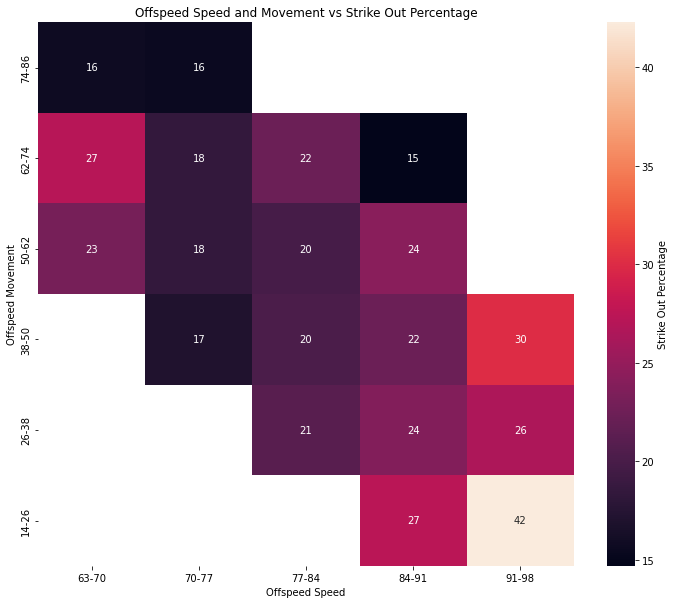

In [40]:
# Create a copy of our data so we don't modify it and drop all rows that don't contain valid entries
sk = adjusted_pitch_data[['fastball_total_movement', 'fastball_avg_speed', 'p_k_percent']].copy()
sk.dropna(inplace=True)

#to create our list of conditions, we need to see what ranges we need. Therefore, we find the max and min.
#adjusted_pitch_data["fastball_total_movement"].min() = 9.2
#adjusted_pitch_data["fastball_total_movement"].max() = 63.3
#Therefore, we need to make our ranges of our conditions from 9 to 64.

#create a list of our conditions
conditions = [
    (sk['fastball_total_movement'] > 9) & (sk['fastball_total_movement'] <= 19),
    (sk['fastball_total_movement'] > 19) & (sk['fastball_total_movement'] <= 29),
    (sk['fastball_total_movement'] > 29) & (sk['fastball_total_movement'] <= 39),
    (sk['fastball_total_movement'] > 39) & (sk['fastball_total_movement'] <= 49),
    (sk['fastball_total_movement'] > 49) & (sk['fastball_total_movement'] <= 59),
    (sk['fastball_total_movement'] > 59) & (sk['fastball_total_movement'] <= 69)
    ]
# create a list of the values we want to assign for each condition
values = ['09-19', '19-29', '29-39', '39-49','49-59','59-69']
# create a new column and use np.select to assign values to it using our lists as arguments
sk['fastball_movement_category'] = np.select(conditions, values)


#We do the same but now for speed. We still need to see what ranges we need. Therefore, we find the max and min.
#adjusted_pitch_data["fastball_avg_speed"].min() = 80.3
#adjusted_pitch_data["fastball_avg_speed"].max() = 101.1
#Therefore, we need to make our ranges of our conditions from 80 to 102.

conditions = [
    (sk['fastball_avg_speed'] > 80) & (sk['fastball_avg_speed'] <= 84),
    (sk['fastball_avg_speed'] > 84) & (sk['fastball_avg_speed'] <= 88),
    (sk['fastball_avg_speed'] > 88) & (sk['fastball_avg_speed'] <= 92),
    (sk['fastball_avg_speed'] > 92) & (sk['fastball_avg_speed'] <= 96),
    (sk['fastball_avg_speed'] > 96) & (sk['fastball_avg_speed'] <= 102)
    ]
# create a list of the values we want to assign for each condition
values = ['80-84', '84-88', '88-92', '92-96','96-102']

# create a new column and use np.select to assign values to it using our lists as arguments
sk['fastball_speed_category'] = np.select(conditions, values)

#Now our data is categorized. Now we want to take these categories and format the dataset into a format the heatmap function will take.
#Therefore, we have to move our speed categories to be the x index, and our fastball movement category to the y index, and the values to be strike out
#percentage. We can do this by performing group bys (to get the strike out values per speed,movement pairing). 
sk2 = sk.groupby(['fastball_speed_category','fastball_movement_category'])['p_k_percent'].mean()
#we reset it back to a dataframe and reset the index, setting us up for pivots.
sk2 = sk2.to_frame().reset_index()
#with everything set up, we can perform a pivot to properly format the x and y indices for a heatmap.
pivot = sk2.pivot(index='fastball_movement_category', columns='fastball_speed_category', values='p_k_percent')

#now we draw the heat map!
fig, ax = plt.subplots()
sns.heatmap(pivot, annot = True,  cbar_kws={'label': 'Strike Out Percentage'}) #the cbar_kws portion is the label for the color bar
ax.invert_yaxis() #the heat map function goes large to small upwards on the y axis, so we invert it to make it a more traditional scale.
plt.title("Fastball Speed and Movement vs Strike Out Percentage")
plt.xlabel("Fastball Speed")
plt.ylabel("Fastball Movement")
plt.show

#------------------------------------Now for Breaking Balls-------------------------------------

sk = adjusted_pitch_data[['breaking_total_movement', 'breaking_avg_speed', 'p_k_percent']].copy()
sk.dropna(inplace=True)
sk
#to create our list of conditions, we need to see what ranges we need. Therefore, we find the max and min.
#adjusted_pitch_data['breaking_total_movement'].min() = 23.6
#adjusted_pitch_data["breaking_total_movement"].max() = 90.3
#Therefore, we need to make our ranges of our conditions from 23 to 91.

#create a list of our conditions
conditions = [
    (sk['breaking_total_movement'] > 23) & (sk['breaking_total_movement'] <= 35),
    (sk['breaking_total_movement'] > 35) & (sk['breaking_total_movement'] <= 47),
    (sk['breaking_total_movement'] > 47) & (sk['breaking_total_movement'] <= 59),
    (sk['breaking_total_movement'] > 59) & (sk['breaking_total_movement'] <= 71),
    (sk['breaking_total_movement'] > 71) & (sk['breaking_total_movement'] <= 83),
    (sk['breaking_total_movement'] > 83) & (sk['breaking_total_movement'] <= 95)
    ]
# create a list of the values we want to assign for each condition
values = ['23-35', '35-47', '47-59', '59-71','71-83','83-95']
# create a new column and use np.select to assign values to it using our lists as arguments
sk['breaking_movement_category'] = np.select(conditions, values)


#We do the same but now for speed. We still need to see what ranges we need. Therefore, we find the max and min.
#adjusted_pitch_data["breaking_avg_speed"].min() = 66.1
# adjusted_pitch_data["breaking_avg_speed"].max() = 92.6
#Therefore, we need to make our ranges of our conditions from 66 to 93.

conditions = [
    (sk['breaking_avg_speed'] > 66) & (sk['breaking_avg_speed'] <= 72),
    (sk['breaking_avg_speed'] > 72) & (sk['breaking_avg_speed'] <= 78),
    (sk['breaking_avg_speed'] > 78) & (sk['breaking_avg_speed'] <= 84),
    (sk['breaking_avg_speed'] > 84) & (sk['breaking_avg_speed'] <= 90),
    (sk['breaking_avg_speed'] > 90) & (sk['breaking_avg_speed'] <= 96)
    ]
# create a list of the values we want to assign for each condition
values = ['66-72', '72-78', '78-84', '84-90','90-96']
   
# create a new column and use np.select to assign values to it using our lists as arguments
sk['breaking_speed_category'] = np.select(conditions, values)


#Now our data is categorized. Now we want to take these categories and format the dataset into a format the heatmap function will take.
#Therefore, we have to move our speed categories to be the x index, and our fastball movement category to the y index, and the values to be strike out
#percentage. We can do this by performing group bys (to get the strike out values per speed,movement pairing). 
sk2 = sk.groupby(['breaking_speed_category','breaking_movement_category'])['p_k_percent'].mean()
#we reset it back to a dataframe and reset the index, setting us up for pivots.
sk2 = sk2.to_frame().reset_index()
#with everything set up, we can perform a pivot to properly format the x and y indices for a heatmap.
pivot = sk2.pivot(index='breaking_movement_category', columns='breaking_speed_category', values='p_k_percent')

#graph like normal
fig, ax = plt.subplots()
sns.heatmap(pivot, annot = True,  cbar_kws={'label': 'Strike Out Percentage'})
ax.invert_yaxis() #the heat map function goes large to small upwards on the y axis, so we invert it to make it a more traditional scale.
plt.title("Breaking Speed and Movement vs Strike Out Percentage")
plt.xlabel("Breaking Speed")
plt.ylabel("Breaking Movement")
plt.show()

#---------------------------------Now for Offspeeds----------------------------------
sk = adjusted_pitch_data[['offspeed_total_movement', 'offspeed_avg_speed', 'p_k_percent']].copy()
sk.dropna(inplace=True)
sk
#to create our list of conditions, we need to see what ranges we need. Therefore, we find the max and min.
#adjusted_pitch_data['offspeed_total_movement'].min() = 14
#adjusted_pitch_data["offspeed_total_movement"].max() = 83
#Therefore, we need to make our ranges of our conditions from 14 to 83.
#create a list of our conditions
conditions = [
    (sk['offspeed_total_movement'] > 13.9) & (sk['offspeed_total_movement'] <= 26),
    (sk['offspeed_total_movement'] > 26) & (sk['offspeed_total_movement'] <= 38),
    (sk['offspeed_total_movement'] > 38) & (sk['offspeed_total_movement'] <= 50),
    (sk['offspeed_total_movement'] > 50) & (sk['offspeed_total_movement'] <= 62),
    (sk['offspeed_total_movement'] > 62) & (sk['offspeed_total_movement'] <= 74),
    (sk['offspeed_total_movement'] > 74) & (sk['offspeed_total_movement'] <= 86)
    ]
# create a list of the values we want to assign for each condition
values = ['14-26', '26-38', '38-50', '50-62','62-74','74-86']
# create a new column and use np.select to assign values to it using our lists as arguments
sk['offspeed_movement_category'] = np.select(conditions, values)


#We do the same but now for speed. We still need to see what ranges we need. Therefore, we find the max and min.
#adjusted_pitch_data["offspeed_avg_speed"].min() = 63
#adjusted_pitch_data["offspeed_avg_speed"].max() = 95.2
#Therefore, we need to make our ranges of our conditions from 63 to 96.

conditions = [
    (sk['offspeed_avg_speed'] > 62.9) & (sk['offspeed_avg_speed'] <= 70),
    (sk['offspeed_avg_speed'] > 70) & (sk['offspeed_avg_speed'] <= 77),
    (sk['offspeed_avg_speed'] > 77) & (sk['offspeed_avg_speed'] <= 84),
    (sk['offspeed_avg_speed'] > 84) & (sk['offspeed_avg_speed'] <= 91),
    (sk['offspeed_avg_speed'] > 91) & (sk['offspeed_avg_speed'] <= 98)
    ]
# create a list of the values we want to assign for each condition
values = ['63-70', '70-77', '77-84', '84-91','91-98']
   
# create a new column and use np.select to assign values to it using our lists as arguments
sk['offspeed_speed_category'] = np.select(conditions, values)

#Now our data is categorized. Now we want to take these categories and format the dataset into a format the heatmap function will take.
#Therefore, we have to move our speed categories to be the x index, and our fastball movement category to the y index, and the values to be strike out
#percentage. We can do this by performing group bys (to get the strike out values per speed,movement pairing). 
sk2 = sk.groupby(['offspeed_speed_category','offspeed_movement_category'])['p_k_percent'].mean()
#we reset it back to a dataframe and reset the index, setting us up for pivots.
sk2 = sk2.to_frame().reset_index()
#with everything set up, we can perform a pivot to properly format the x and y indices for a heatmap.
pivot = sk2.pivot(index='offspeed_movement_category', columns='offspeed_speed_category', values='p_k_percent')

#graph like normal
fig, ax = plt.subplots()
sns.heatmap(pivot, annot = True,  cbar_kws={'label': 'Strike Out Percentage'})
ax.invert_yaxis() #the heat map function goes large to small upwards on the y axis, so we invert it to make it a more traditional scale.
plt.title("Offspeed Speed and Movement vs Strike Out Percentage")
plt.xlabel("Offspeed Speed")
plt.ylabel("Offspeed Movement")
plt.show()

**Very Interesting! We can see a visible trend with these visualizations:**

- There seems to be a trade off between speed and movement
    - All pitches, the harder you throw your pitch, the less it actually moves
- For all pitches: the faster you go and the less break you have, the higher your strike out percentage 
    - There is an existing trend through all three types of pitch. It seems that the faster a pitcher pitches, minimizing break, the higher their strike out percentage. Additionally, it seems the Strike Out Percentages for fastballs and Offspeeds are the lowest when pitches are slow and break a lot; where as strike out percentages for breakers are lowest at low speeds and low breaks. 

This trend is interesting and even more so since it is strongly apparent across all types of pitches. Therefore, we can conclude that for pitching, having higher speed pitches with controlled breaks result in the highest strike out percentages.

### Now towards hitting!

We now visualize and see the changes over time in what Pitchers decide to throw, and the affects it has on their strikeout rate. However, is this making a difference? Are pitchers pitching better and getting less hits or have batters adapted quickly to these changes? Baseball is an ever changing sport, and we are now interested in seeing if the changes the pitchers have made have yielded any results.

Now, we will first analyze the leagues overall strikeout percentage, and see if the moves toward pitch sabermetrics (movement, velocity, and spin) have changed how much the pitchers strikeout percentages!

In [ ]:
adjusted_pitch_data.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'p_game',
       'p_formatted_ip', 'p_total_hits', 'p_strikeout', 'p_walk',
       'p_k_percent', 'p_bb_percent', 'p_win', 'p_era', 'exit_velocity_avg',
       'launch_angle_avg', 'hard_hit_percent', 'n_fastball_formatted',
       'fastball_avg_speed', 'fastball_avg_spin', 'fastball_avg_break_x',
       'fastball_avg_break_z', 'n_breaking_formatted', 'breaking_avg_speed',
       'breaking_avg_spin', 'breaking_avg_break_x', 'breaking_avg_break_z',
       'n_offspeed_formatted', 'offspeed_avg_speed', 'offspeed_avg_spin',
       'offspeed_avg_break_x', 'offspeed_avg_break_z',
       'fastball_total_movement', 'breaking_total_movement',
       'offspeed_total_movement'],
      dtype='object')

Like mentioned earlier, let's start off as broadly as we can get. How well are batters hitting? We can visualize this by graphing the change in strike out percentages over time to see if there are any noticable trends. We will use a standard line graph to help visualize change over time.

Text(0.5, 0, 'Time (Years)')

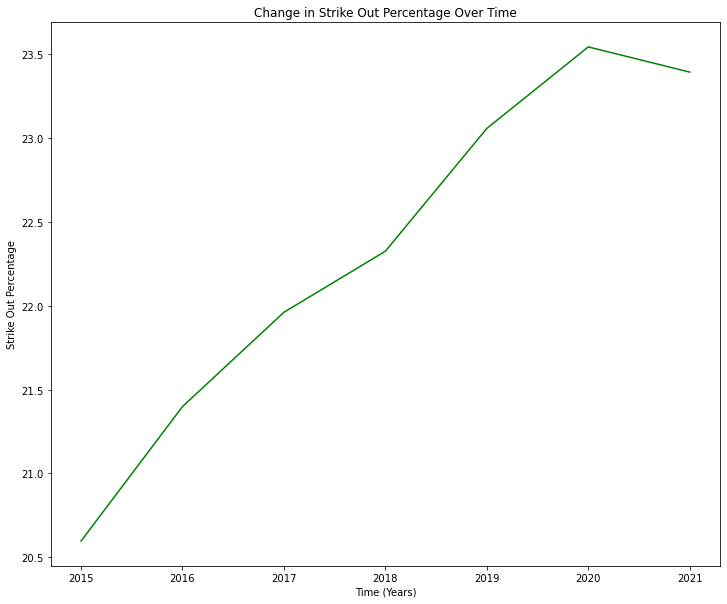

In [19]:
# Group data by year
hitData = adjusted_pitch_data.groupby(by=['year'])[['p_k_percent', 'p_era', 'hard_hit_percent']].mean().reset_index()

# Create line graph regarding the strikeout percentage over time
plt.plot(hitData['year'], hitData['p_k_percent'], color = 'green')
plt.title("Change in Strike Out Percentage Over Time")
plt.ylabel("Strike Out Percentage")
plt.xlabel("Time (Years)")

From this initial investigation, we can see that strike out rates are on the rise, coinciding with the pitcher's changes. In fact, this change is actually pretty significant at almost 3%! This gives us cause to investigate further. However, before we investigate further, I want to double check on a counter point. Many sports recently have changed to a more "flashy" playstyle. NBA fans and old timers never have seen as many 3 point shots being attempted before, and now the NBA is dominated by 3 point plays versus the traditional jump shots and fundamental layups. Additionally, the NFL, has recently relaxed its rules, allowing offenses to get away with more push offs and other subtle actions that allow offenses to flourish. The NFL has now recently seen its highest rates of passing in games, and as a result, some of the highest average scores seen. These two follow a trend of different sports leagues beginning to encourage high scoring high action gameplay to draw in more viewers attention. While fans who enjoy the fundamentals of the game may appreciate high levels of defense and low scoring games, newer fans and outsiders want to see cool and big things happen.

Is baseball any different? One style of a hitter in Baseball are the Power Hitters. These are the people that hit the highlight home runs, making the fans and commentators scream at how far the batter just hit the ball. These Power Hitters hit frequently, and swing hard. As a result, they hit more home runs, but as a consequence, also strike out at a much higher rate. These hitters are an all or nothing type of player. Could the higher rates of strike outs also result from different trends of hitters? Is the MLB also transitioning to an all or nothing, big highlight or nothing, league like the NBA and NFL? Let's investigate.

We can do this with a quick check. Will compare the league average strikeout percentage and the leagues hard hit percentage. As explained earlier, hard hit percentage is a ball hit at greater than 95 mph. Let's see how the two have changed since the introduction to the statcast era.

Since we want to compare two things, we will actually use one graph with 2 subplots on it. This way, we can compare and contrast the relationship between the two. We can do this by utilizing the subplots feature. After that, we have to manipulate the chart y axis since strike out percentage and hard hit percentage are in different percentage ranges. We can do this by changing specific parts of the chart, which plt luckily lets us do. After that, we plot like normal and get a hopefully beautiful and interesting map!

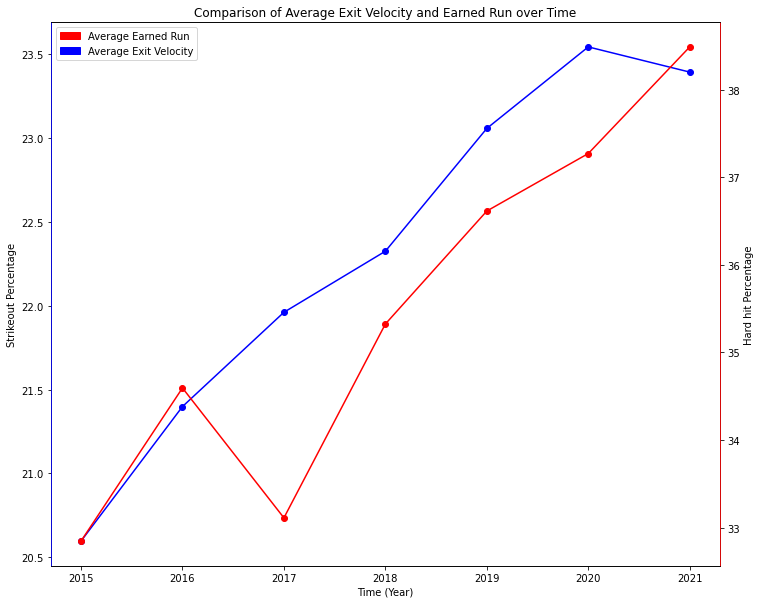

In [38]:
#Set up twin subplots on the main chart so that we can compare and contrast our two points of interest.
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#Let's plot our data. They share the same x axis of years, only thing different is the y data. We can manually set the tick marks to '-o', which 
#means points with a line through them, making it easier to see trends over time which is beneficial for us. Finally, we color code it for clarity.
ax1.plot(hitData['year'], hitData['p_k_percent'], '-o', color = 'blue')
ax2.plot(hitData['year'], hitData['hard_hit_percent'], '-o', color = 'red')

#Setting up titles and albels
plt.title("Comparison of Average Exit Velocity and Earned Run over Time")
ax2.set_ylabel("Hard hit Percentage")
ax1.set_ylabel("Strikeout Percentage")
ax1.set_xlabel("Time (Year)")

plt.gca().spines['right'].set_color('red')        # setting up Y-axis tick color to red
plt.gca().spines['left'].set_color('blue')        # setting up Y-axis tick color to blue

#Since we have 2 plots, the legend will be a bit tricky. We actually use this patches feature to manually put the specific colors and descriptors 
#for the legend.
red_patch = mpatches.Patch(color='red', label='Average Earned Run')
blue_patch = mpatches.Patch(color='blue', label='Average Exit Velocity')

plt.legend(handles=[red_patch, blue_patch])#sizing


Woah! So it is confirmed that the league has changed! Hitters are striking out more (3% increase ) but hitters are also hitting the ball much harder (~5% increase)! While outside the scope of this project since we only fixate on pitchers, Statcast is changing hitter approach to the game, opting for them to go for harder hit balls while not being afraid to strike out nearly as much. 

# Hypothesis Testing

So far we have done some interesting data visualizations regarding the state of major league baseball. We have seen that pitch variety is starting to change, pitchers are making the pitches spin more, and as a result items like batter strikeout rates are increasing. 

These are interesting things to consider, but let's try and get a more tangiable look into variables teams can use. What we will do is introduce the topic of linear regression to try and model a couple valuable metrics to pitcher success: Wins and ERA. Wins are home many games a pitcher "wins" in a given year. As easy as it sounds, there are many tangiable factors that go into deciding if a pitcher gets a win. A pitcher must throw more than 5 and 2/3 innings (Throw 5 complete innings and get 2 outs in the 6th inning), be in the lead when he leaves the game, and his team must win the game in order for him to get credited with a win.
ERA goes even further. ERA stands for Earned Run Average, and is a estimate into how many runs a pitcher gives up every nine innings he throws. There is a problem with this though. The opposing team is allowed to score runs on a pitcher, but they won't count against his ERA. If a batter reaches base or advances because of an error made in the field, that run is no longer an earned run.

So, after covering a little bit of the background, lets dive into a regression analysis. The purpose of a regression analysis is to 
- See if a linear relationship exists between Wins, and several other parameters
- See if that relationship (if it exists) can be fit with a line, able to predict the outcomes of future pitchers based on metrics

To start, we should pick some parameters to estimate pitcher wins with. This is a daunting task, because we have nearly 30 different data points to choose from. Therefore, lets conduct a Correlation test between all the different parameters and wins. Correlation is defined as having a close relationship in movement between two variables. For example, the amount of time you spend on a treadmill and the number of calories burned is an example of a postiive correlation, the more time you spend on the treadmill, the more calories you will burn.

To conduct this, we will use the corr command that comes with pandas databases. You can read more about it <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html">here</a>. What corr will do is reveal the correlation coefficient between all the columns in our pitching dataframe. However, we don't want this, as this will be a nearly 30x30 grid. So, what we will do is only take the results from correlation between wins and the other parameters.

Finally, we will only be doing this analysis on STARTERS. As mentioned earlier, relievers role is not to win games, but to finish the game after the starter leaves. Although relivers can win games, this is not an employable metric for them, so we will exclude them




In [21]:
# To start, let's just build a linear regression model 5 most important items in terms of correlation. 
starters.corr()['p_win'].sort_values(ascending=False, key = lambda x: abs(x))

p_win                      1.000000
p_formatted_ip             0.724154
p_strikeout                0.643083
p_era                     -0.545802
p_total_hits               0.434720
p_k_percent                0.304156
hard_hit_percent          -0.272601
exit_velocity_avg         -0.252412
p_bb_percent              -0.249747
p_walk                     0.229564
p_game                     0.197920
player_id                 -0.144344
year                      -0.132679
offspeed_avg_speed         0.098330
fastball_avg_spin          0.098206
launch_angle_avg          -0.089336
fastball_avg_speed         0.082818
breaking_avg_spin          0.082447
breaking_total_movement    0.080805
offspeed_avg_spin          0.064094
n_breaking_formatted       0.060164
n_offspeed_formatted      -0.047425
breaking_avg_break_z      -0.045564
offspeed_total_movement    0.043860
n_fastball_formatted      -0.030052
fastball_avg_break_x      -0.029058
breaking_avg_speed         0.024410
offspeed_avg_break_x      -0

So, as we can see, the most important parameters to our regression model (excluding wins) are 
- innings pitched
- total strikeouts
- total hits
- strikeout percentage
- total earned run average

This makes sense logically!
- The more innings a pitcher throws, the more likely they will win more games, as the deeper they go into the games the more times they qualify to win
- The more players that are striking out, the less likely they will score runs
- Less hits and Less walks == Less baserunners, less chance to get on base and score guys
- Less runs given up, more wins

But this is interesting! Strikeouts show up twice! Is it really that important for pitchers to strike out hitters in order to win games? This is a question we will address later.

Now, to build the regression model itself. We will utilize a library called Scikit-Learn to do most of the regression formulas for us. Regression modeling is an extremely complex task that you can learn more about <a href="https://hbr.org/2015/11/a-refresher-on-regression-analysis">here</a>. But essentially, to form a regression model we look to minimize the Residuals, forming the least squares solution. The residuals are the difference between the actual value, and the projected value made by the regression line. 



**About the model**

A linear regression model, in order to be valid, must follow these certain assumptions.
- The Residuals must independent, and identically distributed
- The Residuals must be normally distributed as $$Residual Distribution = \mathcal{N}(0,\,\sigma^{2})\,.$$

**About Machine Learning**

In machine learning its important to not overfit our data. What exactly is overfitting? Overfitting is the process in which your model is too well suited
for the piece of data that it is applied on, that it doesn't fit well into everyday scenarios. Overfitting is very dangerous and is something that we have to consider, even though we have the entire MLB pitcher population available to us. So, as a result, we will split our data up into a **train-test split**. As such, when we fit our model with the train set, we will have another set called the test split to verify whether or not our model actually holds up when we introduce new pitchers. You can learn more about train-test splitting <a href="https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/">here</a> and why we do it, but we will also employ the sklearn library to manually divide up our data into appropriate sets.



In [22]:
# First, we must format our data appropriatley. We must create a matrix with the appropriate parameters for our X values, and
# An appropriate column vector for our wins. We can do this with numpy and its reshape command

X = starters[['p_formatted_ip', 'p_strikeout', 'p_total_hits', 'p_k_percent', 'p_era']]
X['p_k_percent'].apply(lambda x: x * 100)
y = np.reshape(starters['p_win'].values, (-1,1))
# Form our train-test split using a module from sklearn

train_x, test_x, train_y, test_y = train_test_split(X,y)

Now that we have the train test split, we can actually make our linear regression model.

In [23]:
mod = lm.OLS(endog=train_y, exog=train_x).fit()


# Remember, our variables are innings pitched, total strikeouts, total hits, strikeout percentage, total earned run average, so lets output it nicely
"""
variables = ['innings pitched', 'total strikeouts', 'total hits', 'Strikeout Percentage', 'ERA']
equation = "Our Wins equation is the following: \n Total Wins = " + str(model.intercept_[0]) + " + "

for i in range(len(variables)):
    equation += " ( " + variables[i] + " * " + str(model.coef_[0][i]) + " ) +"

print(equation[:-1])
"""
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              2222.
Date:                Sat, 14 May 2022   Prob (F-statistic):                        0.00
Time:                        22:39:24   Log-Likelihood:                         -1793.0
No. Observations:                 764   AIC:                                      3596.
Df Residuals:                     759   BIC:                                      3619.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
p_formatted_ip     0.0921      0.008     11.459      0.000       0.076       0.108
p_strikeout       -0.0096      0.006     -1.692      0.091      -0.021       0.002
p_total_hits      -0.0098      0.007     -1.303      0.193      -0.024       0.005
p_k_percent        0.0816      0.031      2.622      0.009       0.021       0.143
p_era             -0.8908      0.118     -7.533      0.000      -1.123      -0.659
==============================================================================
Omnibus:                        9.400   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.708
Skew:                           0.227   Prob(JB):                      0.00780
Kurtosis:                       3.314   Cond. No.                         338.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

Interesting! What can we conclude out of this? 
- Our correlation factors hold from earlier!
    - Our regression model shows wins increase with more innings and more strikeouts
    - Weird! Wins Decrease with increase in strikeout percentage, yet increase with total strikeouts? 
    

<br>

**Is our model valid?**

We again must check for the assumptions of our residuals for our linear regression model. We must check if residuals are
- Independent
- Identically distributed
- Normally distributed

We can do this through analyzing a  <a href="https://online.stat.psu.edu/stat462/node/117/">residual vs fit plot</a>. 
If the points are well distributed, and show pretty constant variance, we can assume the identical distribution and 
independence of these residuals. 

We will be making our residual plot with 

## What about Expected Run Averages?


In [29]:
#once again, let's use the correlation
adjusted_pitch_data.corr()['p_era'].sort_values(ascending=False, key = lambda x: abs(x)).head(6)

p_era                1.000000
p_k_percent         -0.445213
p_game              -0.394098
hard_hit_percent     0.363965
exit_velocity_avg    0.349106
p_win               -0.307707
Name: p_era, dtype: float64

Therefore it seems that the five most highly correlated fields are p_k_percent, p_game, hard_hit_percent, exit_velocity_avg, and p_win. Since we have discussed strike out percentage so frequently, let's use strike out percentages here.

In [31]:
# We have to make and X and Y to fit our linear regression. We do this here by obtaining the data for our X and then formatting it into percentages.
# Then we take our Y, or to predict which is ERA, and then format that in the array format as well.
X = adjusted_pitch_data[['p_k_percent']]
X['p_k_percent'].apply(lambda x: x * 100)
y = np.reshape(adjusted_pitch_data['p_era'].values, (-1,1))

# Form our train-test split using a module from sklearn, so that we have a test and training set that are randomly split.
train_x, test_x, train_y, test_y = train_test_split(X,y)

In [32]:
#create our regression model using training data
pitchERA = lr.LinearRegression()
eraFit = pitchERA.fit(train_x.values, train_y)

#formatting it to print
m = str(eraFit.coef_[0]).lstrip('[').rstrip(']')
b = str(eraFit.intercept_).lstrip('[').rstrip(']')
print(f"The Slope is: {m} \nThe Intercept is: {b} \nFunction: y = {m}x + {b}")

The Slope is: -0.11079938 
The Intercept is: 6.76384005 
Function: y = -0.11079938x + 6.76384005


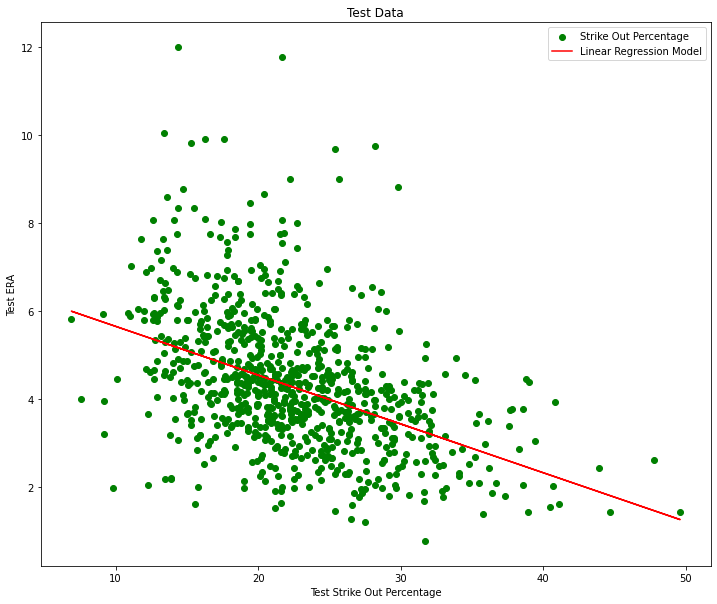

In [33]:
#Now let's plot our regression with the test data to see how well it performed with the test data.
plt.scatter(test_x, test_y, color = 'green')
plt.title("Test Data")
plt.ylabel("Test ERA")
plt.xlabel("Test Strike Out Percentage")
x1 = [[x] for x in test_x['p_k_percent'].values]
plt.plot(x1, eraFit.predict(x1), color = 'red')
plt.legend(["Strike Out Percentage","Linear Regression Model"])


In [34]:
#Calculate P and R Squared
x2 = sm.add_constant(train_x)
est = sm.OLS(train_y, x2)
_2 = est.fit()
print(_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     625.7
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.87e-123
Time:                        22:45:20   Log-Likelihood:                -4259.9
No. Observations:                2505   AIC:                             8524.
Df Residuals:                    2503   BIC:                             8536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7638      0.102     66.495      